In [1]:
from mtcnn.mtcnn import MTCNN

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from glob import glob
import re
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
import os

anfas_detector = MTCNN(steps_threshold = [0.4, 0.6, 0.6], min_face_size = 100)

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [3]:
import fnmatch
import os
import re
from pathlib import Path


def resize_by_height(img, new_height):
    '''
    Input: image, new_height
    Returns: image with new height and scaled width
    '''
    height, width = img.shape[:2]
    resize_multiple = new_height / height
    img = cv2.resize(img, None, fx=resize_multiple, fy=resize_multiple, interpolation=cv2.INTER_AREA)
    return img


def get_face_crop(img):

    results = anfas_detector.detect_faces(img)
    if results == []: 
        return results, None

    x, y, w, h = results[0]['box']

    y_border, x_border = img.shape[:2]
    x1, y1, x2, y2 = max(0, x), max(0, y), min(x_border, x+w), min(y_border, y+h)

    face_crop = img[y1:y2, x1:x2]
    return face_crop, round(results[0]['confidence'], 2)


def get_all_fnames(base_folder):
    all_fnames = glob(str(Path(base_folder, '**', '*')))
    all_imgs = []
    patterns = ['*jpg', '*jpeg', '*png']

    for pattern in patterns:
        match = re.compile(fnmatch.translate(pattern), re.IGNORECASE).match
        valid_pths = [pth for pth in all_fnames if match(pth)]
        all_imgs.extend(valid_pths)
                      
    return all_imgs
         
    

/home/nikolay/.ve/merlin/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


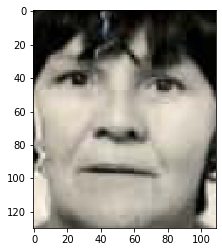

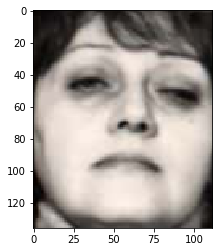

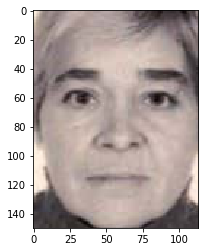

In [9]:
base_folder = 'example'
result_base_folder = Path(f'{base_folder}_result')
if not os.path.exists(result_base_folder):
    os.mkdir(result_base_folder)
    
    
all_imgs = get_all_fnames(base_folder)
for img_path in tqdm(all_imgs[:]):
    folder_name = Path(img_path).parts[1]
    img_name = Path(img_path).parts[2]
    
    img = cv2.imread(img_path)
    if img.shape[0] > img.shape[1]:
        img = cv2.rotate(img, rotateCode = 0)

    img = resize_by_height(img, 820)
    
    face_crop, confidence = get_face_crop(img)
    if len(face_crop) == 0: 
        img = cv2.rotate(img, rotateCode = 0)
        face_crop, confidence = get_face_crop(img)
        plt.imshow(img)
        plt.show()
        if len(face_crop) == 0: 
            img = cv2.rotate(img, rotateCode = 0)
            face_crop, confidence = get_face_crop(img)
            plt.imshow(img)
            plt.show()
            if len(face_crop) == 0: 
                img = cv2.rotate(img, rotateCode = 0)
                face_crop, confidence = get_face_crop(img)
                plt.imshow(img)
                plt.show()
                
            else: continue
        
        
    if not os.path.exists(result_base_folder/folder_name):
        os.mkdir(result_base_folder/folder_name)
        
    cv2.imwrite(str(result_base_folder/folder_name/Path(str(confidence)+'_'+img_name)), face_crop)
    
    plt.imshow(face_crop)
    plt.show()

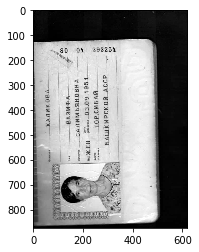

In [22]:
img = cv2.imread('11_20131204102042.jpg')
plt.imshow(img[:,:,[2,1,0]])

In [15]:
img.shape

(832, 1168, 3)

/home/nikolay/.ve/merlin/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


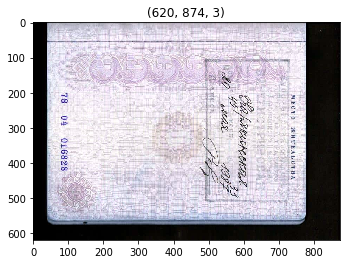

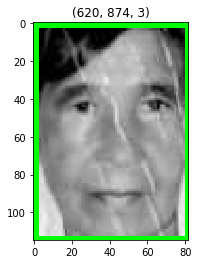

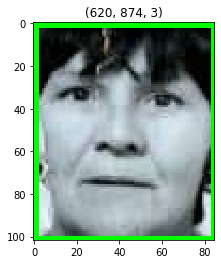

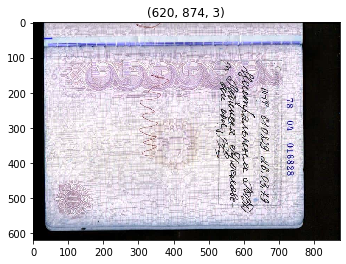

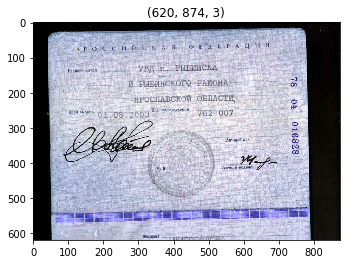

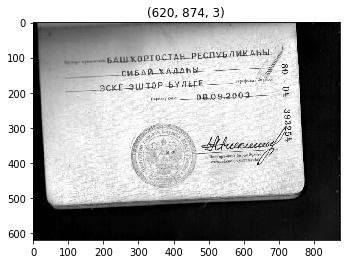

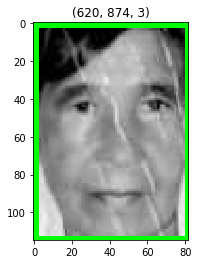

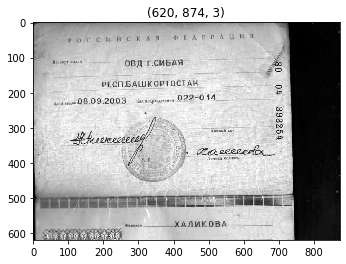

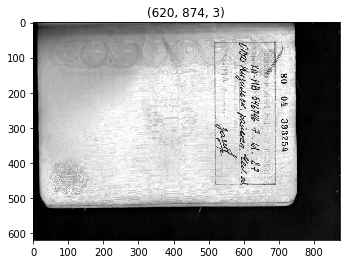

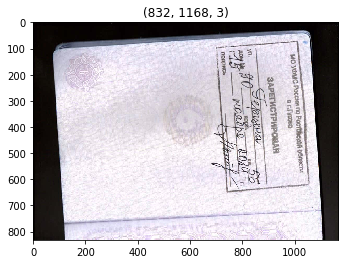

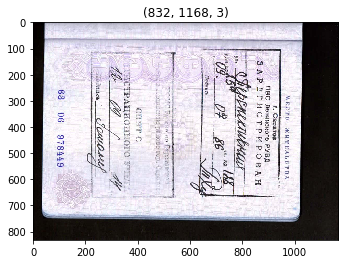

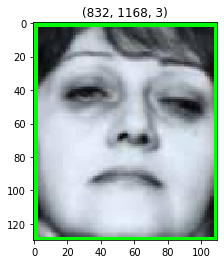

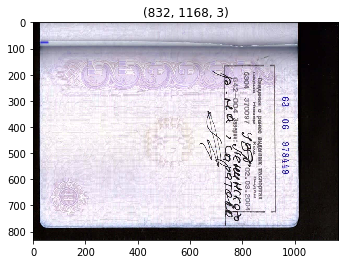

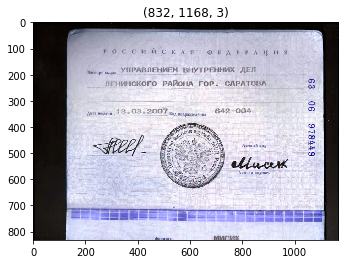

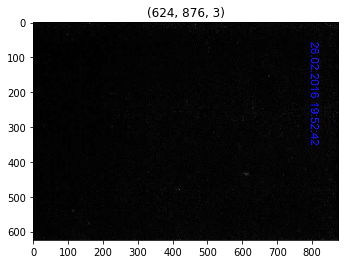

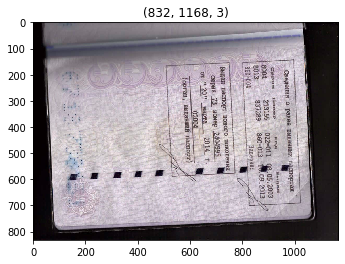

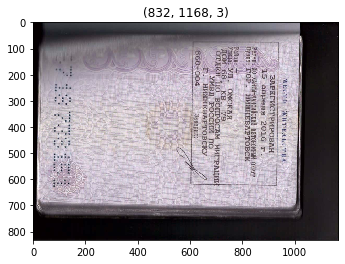

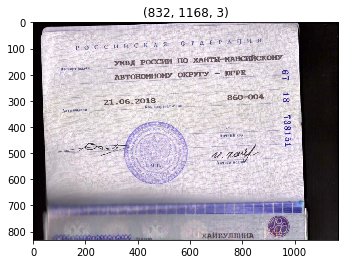

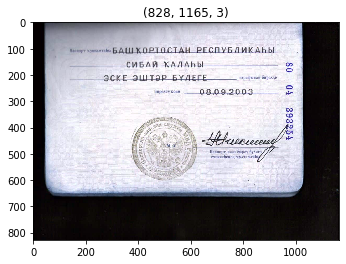

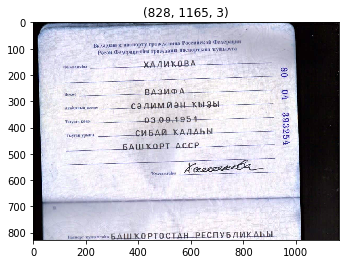

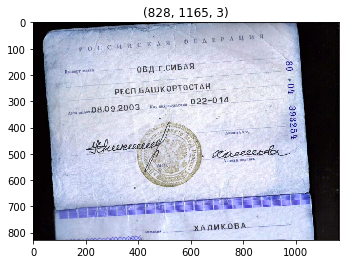

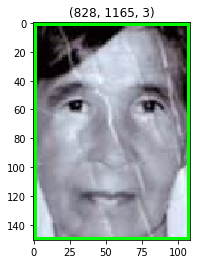

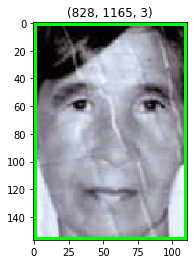

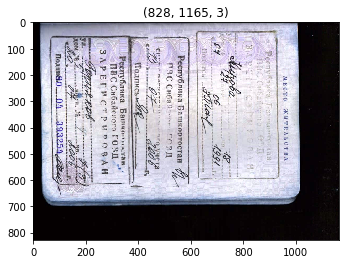

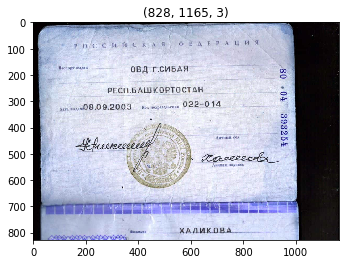

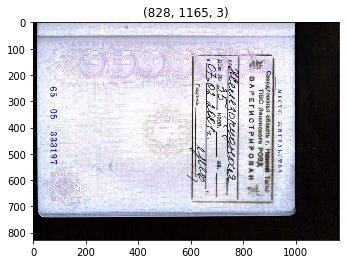

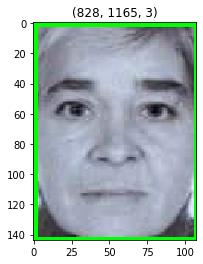

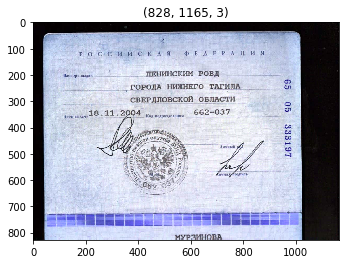

In [138]:
from tqdm import tqdm_notebook as tqdm
anfas_detector = MTCNN(steps_threshold = [0.4, 0.4, 0.4], min_face_size = 100)

for img_path in tqdm(all_imgs[:]):
    img = cv2.imread(img_path)
    if img.shape[0] > img.shape[1]:
        img = cv2.rotate(img, rotateCode = 0)

    results = anfas_detector.detect_faces(img)
    if results == []: 
        plt.imshow(img)
        plt.title(img.shape)
        plt.show()        
        continue

    x, y, w, h = results[0]['box']
    face_crop = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    
    plt.imshow(face_crop)
    plt.title(img.shape)
    plt.show()

/home/nikolay/.ve/merlin/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


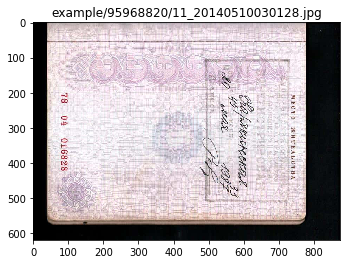

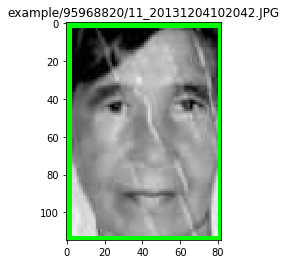

In [167]:
for img_path in tqdm(all_imgs[:2]):
    img = plt.imread(img_path)
    if img.shape[0] > img.shape[1]:
        img = cv2.rotate(img, rotateCode = 0)

    results = anfas_detector.detect_faces(img)
    if results == []: 
        plt.imshow(img)
        plt.title(img_path)
        plt.show()        
        continue

    x, y, w, h = results[0]['box']
    face_crop = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    
    plt.imshow(face_crop)
    plt.title(img_path)
    plt.show()

0.97